<a href="https://colab.research.google.com/github/mqifjjfwiot/Assignments/blob/main/Cookapps/Cookapps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp

# 시각화 용 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.gridspec as gs
from sklearn.tree import plot_tree

from sklearn.preprocessing import MinMaxScaler

# 학습용 라이브러리
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting

/usr/local/lib/python3.8/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
base_url = '/content/drive/MyDrive/Colab Notebooks/Assignments/Cookapps/Data/'

event_date : 결제 일자(YYYY-MM-DD)  
event_timestamp : 결제 당시 UTC timestamp  
custom_user_id : 유저 ID  
price : 상품 가격   
at : 상품 구매 위치  
product_id : 상품명   

In [ ]:
df_i = pd.read_csv(base_url+'20221209_20230119_ZJ_IAP_data.csv')
df_i.iloc[:16]

,event_date,event_timestamp,custom_user_id,price,at,product_id
0,2021-03-09,1670545455,5630,1.99,Shop,dont_giveup_now1
1,2021-03-09,1670546768,5291,1.99,Shop,tiny_coin_pack
2,2021-03-09,1670547429,6016,9.99,Shop,small_delights
3,2021-03-09,1670548769,5962,1.99,Shop,warm_welcome_bundle
4,2021-03-09,1670548814,5744,1.99,Shop,tiny_coin_pack
5,2021-03-09,1670549929,5839,9.99,Shop,small_delights
6,2021-03-09,1670551149,5976,1.99,Shop,tiny_coin_pack
7,2021-03-09,1670551209,5781,2.99,Shop,brace_yourself
8,2021-03-09,1670551234,5806,1.99,Shop,warm_welcome_bundle
9,2021-03-09,1670551341,5092,5.99,Shop,breakthrough_bundle


category : 상품 분류군  
product_id(key) : 상품명  
price($) : 가격  
coin ~ heart(h) : 재화명, 해당 상품에 포함된 재화량  
impression_at : 상품 노출 지면  
purchase_condition : 구매 가능 조건  
purchase_limit : 구매 제한  

In [ ]:
df_pi = pd.read_csv(base_url+'IAP_product_info.csv', encoding = 'CP949')
df_pi.iloc[:16]

,category,product_id(key),price($),coin,hammer,dart,roller,shuffle,rocket,rocket(h),TNT,TNT(h),wild,wild(h),heart(h),impression_at,purchase_condition,purchase_limit
0,Coin 1,tiny_coin_pack,1.99,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
1,Coin 2,basic_coin_pack,7.99,5000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
2,Coin 3,big_coin_pack,14.99,10000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
3,Coin 4,large_coin_pack,29.99,25000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
4,Coin 5,grand_coin_pack,54.99,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
5,Coin 6,deluxe_coin_pack,99.99,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
6,Store Bundle,breakthrough_bundle,5.99,2000.0,NaN,NaN,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,상시,NaN
7,Store Bundle,small_delights,9.99,5000.0,1.0,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,NaN,상시,NaN
8,Store Bundle,box_of_treats,19.99,10000.0,2.0,2.0,2.0,2.0,NaN,12.0,NaN,12.0,NaN,12.0,NaN,NaN,상시,NaN
9,Store Bundle,little_luxuries,39.99,25000.0,4.0,4.0,4.0,4.0,NaN,24.0,NaN,24.0,NaN,24.0,6.0,NaN,상시,NaN


In [ ]:
df_ = pd.read_excel(base_url+'IAP_ZoeysJourney_과제용.xlsx')
df_

,IAP_ZoeysJourney_과제용,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,category,Product ID(Key),Product Name(ENG),Product Name(KOR),Price($),Coin,Hammer,Dart,Roller,Shuffle,Rocket,Rocket(h),TNT,TNT(h),Wild,Wild(h),Heart(h),노출지면,구매 가능 조건,구매제한
1,Coin 1,tiny_coin_pack,Tiny Coin Pack,1000코인,1.99,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
2,Coin 2,basic_coin_pack,Basic Coin Pack,5000코인,7.99,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
3,Coin 3,big_coin_pack,Big Coin Pack,10000코인,14.99,10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
4,Coin 4,large_coin_pack,Large Coin Pack,25000코인,29.99,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
5,Coin 5,grand_coin_pack,Grand Coin Pack,50000코인,54.99,50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
6,Coin 6,deluxe_coin_pack,Deluxe Coin Pack,100000코인,99.99,100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,상시,NaN
7,Store Bundle,breakthrough_bundle,Breakthrough Bundle,실속있는 선물 세트,5.99,2000,NaN,NaN,NaN,NaN,3,0,3,0,3,0,NaN,NaN,상시,NaN
8,Store Bundle,small_delights,Small Delights,작은 선물 세트,9.99,5000,1,1,1,1,3,1,3,1,3,1,NaN,NaN,상시,NaN
9,Store Bundle,box_of_treats,Box of Treats,아담한 선물 세트,19.99,10000,2,2,2,2,3,12,3,12,3,12,NaN,NaN,상시,NaN


### 데이터 플롯 분석

In [ ]:
# 데이터셋 분석용 함수 선언
def summary(df) : 
  print(f'데이터set 크기 : {df.shape}')
  sum = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
  sum['결측치 개수'] = df.isnull().sum().values
  sum['유니크값 종류 개수'] = df.nunique().values
  sum['첫 번째 데이터'] = df.loc[0].values
  sum['두 번째 데이터'] = df.loc[1].values
  sum['세 번째 데이터'] = df.loc[2].values
  sum['네 번째 데이터'] = df.loc[3].values
  sum['다섯 번째 데이터'] = df.loc[4].values

  sum = sum.reset_index()
  return sum

In [ ]:
summary(df_i)

데이터set 크기 : (3379, 6)


,index,데이터 타입,결측치 개수,유니크값 종류 개수,첫 번째 데이터,두 번째 데이터,세 번째 데이터,네 번째 데이터,다섯 번째 데이터
0,event_date,object,0,42,2021-03-09,2021-03-09,2021-03-09,2021-03-09,2021-03-09
1,event_timestamp,int64,0,3338,1670545455,1670546768,1670547429,1670548769,1670548814
2,custom_user_id,int64,0,531,5630,5291,6016,5962,5744
3,price,float64,5,13,1.99,1.99,9.99,1.99,1.99
4,at,object,0,2,Shop,Shop,Shop,Shop,Shop
5,product_id,object,0,17,dont_giveup_now1,tiny_coin_pack,small_delights,warm_welcome_bundle,tiny_coin_pack


In [ ]:
summary(df_pi)

데이터set 크기 : (19, 18)


,index,데이터 타입,결측치 개수,유니크값 종류 개수,첫 번째 데이터,두 번째 데이터,세 번째 데이터,네 번째 데이터,다섯 번째 데이터
0,category,object,0,8,Coin 1,Coin 2,Coin 3,Coin 4,Coin 5
1,product_id(key),object,0,19,tiny_coin_pack,basic_coin_pack,big_coin_pack,large_coin_pack,grand_coin_pack
2,price($),float64,0,14,1.99,7.99,14.99,29.99,54.99
3,coin,float64,1,12,1000.0,5000.0,10000.0,25000.0,50000.0
4,hammer,float64,9,6,NaN,NaN,NaN,NaN,NaN
5,dart,float64,9,6,NaN,NaN,NaN,NaN,NaN
6,roller,float64,9,6,NaN,NaN,NaN,NaN,NaN
7,shuffle,float64,9,6,NaN,NaN,NaN,NaN,NaN
8,rocket,float64,18,1,NaN,NaN,NaN,NaN,NaN
9,rocket(h),float64,11,6,NaN,NaN,NaN,NaN,NaN


###train set 분석

In [ ]:
df_t = pd.read_csv(base_url+'train.csv')
df_t.iloc[:16]

,account_id,sequence,char_level,char_type,job_1,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,is_bot
0,616,0,79,0,3,True,True,False,False,352,154005,42233,13,330,44379,False
1,616,0,82,1,3,True,True,False,False,1015,154005,42233,13,330,44379,False
2,616,0,94,1,3,True,True,False,False,25860,154005,42233,13,330,44379,False
3,669,0,95,1,0,True,True,False,False,25032,211380,2664,15,95,42766,False
4,669,0,63,0,1,True,True,False,False,16,211380,2664,15,95,42766,False
5,1243,0,91,0,1,True,True,False,False,408,36460,1402,1,45,35115,False
6,1243,0,79,0,2,True,True,False,False,438,36460,1402,1,45,35115,False
7,2160,0,59,1,1,True,False,False,False,4,15250,16,0,810,26389,False
8,2721,0,66,1,3,True,True,False,False,24,138795,116,5,390,75581,False
9,2721,0,90,0,2,True,True,False,False,3016,138795,116,5,390,75581,False


135368건, 16개 칼럼

####피처 분석

In [ ]:
summary(df_t)

데이터set 크기 : (135368, 16)


,index,데이터 타입,결측치 개수,유니크값 종류 개수,첫 번째 데이터,두 번째 데이터,세 번째 데이터,네 번째 데이터,다섯 번째 데이터
0,account_id,int64,0,43621,616,616,616,669,669
1,sequence,int64,0,3,0,0,0,0,0
2,char_level,int64,0,100,79,82,94,95,63
3,char_type,int64,0,2,0,1,1,1,0
4,job_1,int64,0,5,3,3,3,0,1
5,social_status_1,bool,0,2,True,True,True,True,True
6,social_status_2,bool,0,2,True,True,True,True,True
7,social_status_3,bool,0,2,False,False,False,False,False
8,social_status_4,bool,0,2,False,False,False,False,False
9,activity_cum_score_1,int64,0,8207,352,1015,25860,25032,16


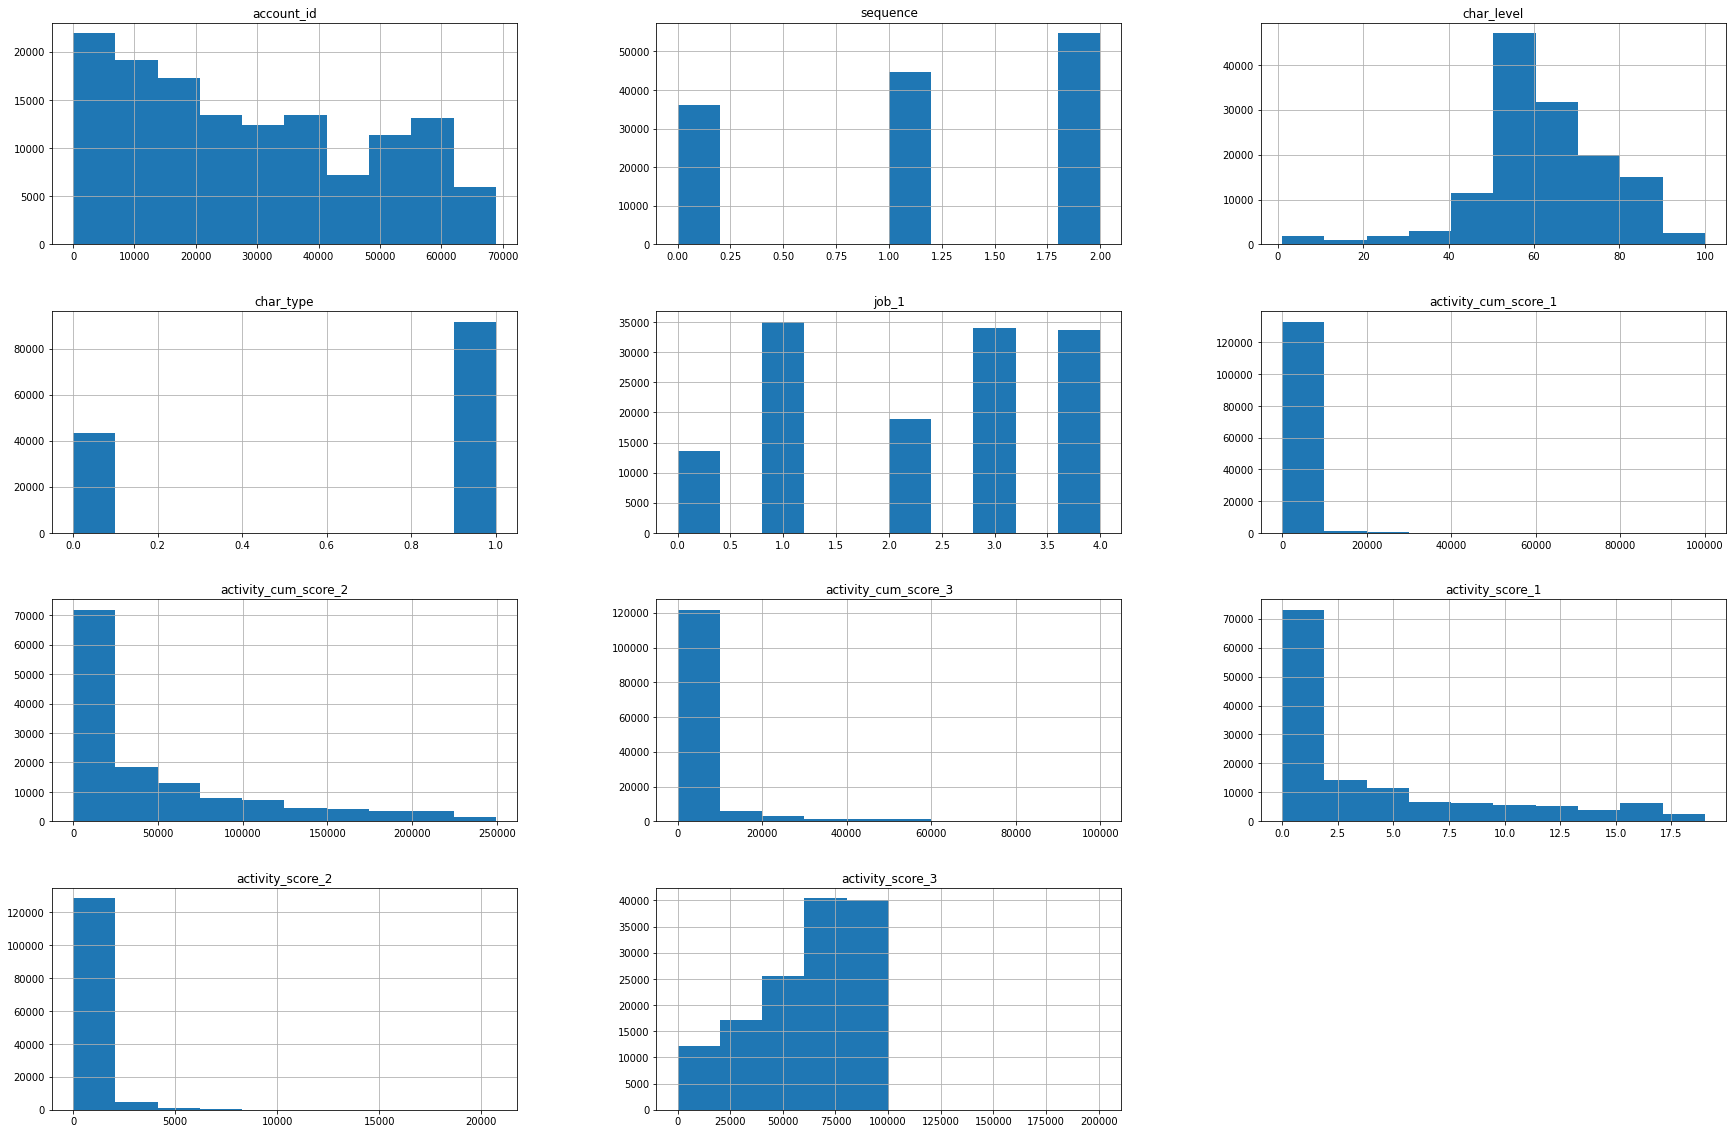

In [ ]:
h = df_t.hist(figsize=(30,20))

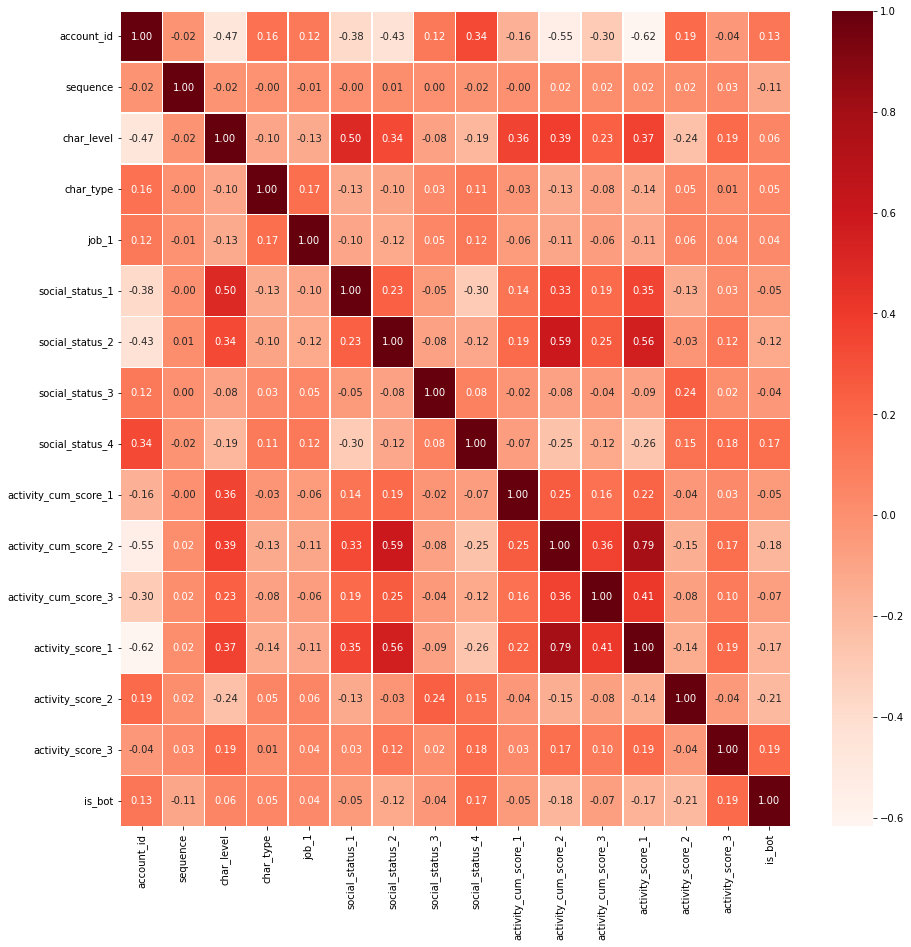

In [ ]:
# 피쳐별 상관관계 탐색
plt.figure(figsize=(15,15))
sns.heatmap(data = df_t.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Reds')

0.5 이상인 피쳐들
*   char_level , social_status_1 : 0.5
*   activity_cum_score2 , social_status_2 : 0.59
*   acticity_score_1 , social_status_2 : 0.56
*   activiti_score_1 , activity_cum_score2 : 0.79

다른 피쳐들은 0.6 이하니 아슬아슬하게 세이프라고 해도 0.79는 약간 위험해보인다.
데이터 왜곡을 피하기 위해 피쳐를 삭제해야 한다면, 0.59와 0.79를 기록한 activity_cum_score2를 삭제하는게 좋아보인다.

단, 유력한 모델이 나오면 한번 해당 피쳐를 삭제한 뒤 재훈련하고 그 차이를 관찰해보자.

1. account_id

In [ ]:
df_t['account_id'].unique().size

43621

실제 ID로 추정. '분류'에는 큰 영향 없을것같음.

'22010'을 예로 보면, 40개의 레코드가 존재하는데 3개 단락으로 나눠져 입력되어있음. 아마 시간에 따른 분포로 구분 된게 아닐까 추측됨. 

2. sequence

In [ ]:
df_t['sequence'].unique()

array([0, 1, 2])

무언가의 상태? 0, 1, 2의 값을 가지며 비율은 35 45 55 정도의 비를 가지는것같다. 고르게 분포되있는 편.

3. char_level

In [ ]:
df_t_copy = pd.DataFrame()
df_t_copy['char_level'] = df_t['char_level']
print(df_t_copy['char_level'].sort_values().unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


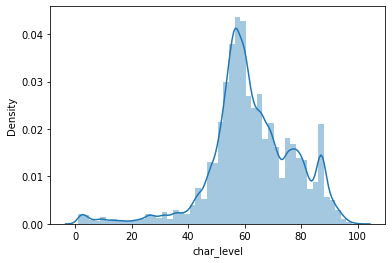

In [ ]:
sns.distplot(df_t['char_level'])

4. char_type

In [ ]:
df_t['char_type'].unique()

array([0, 1])

0과 1 두개로 나눠지는 이진피쳐타입. 비율은 약 1:2

5. job_1

In [ ]:
df_t['job_1'].unique()

array([3, 0, 1, 2, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


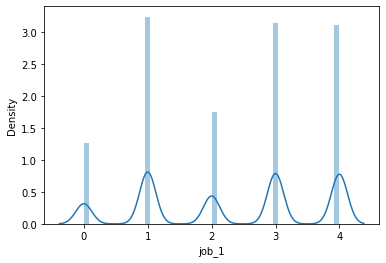

In [ ]:
sns.distplot(df_t['job_1'])

0-4까지. 비교적 고른 분포. 1:3:1.5:3:3

6. social_status_1,2,3,4

In [ ]:
print('social_status_1 True값 : '+str(len(df_t[df_t['social_status_1'] == True])))
print('social_status_1 False값 : '+str(len(df_t[df_t['social_status_1'] == False])))

social_status_1 True값 : 88283
social_status_1 False값 : 47085


In [ ]:
print('social_status_2 True값 : '+str(len(df_t[df_t['social_status_2'] == True])))
print('social_status_2 False값 : '+str(len(df_t[df_t['social_status_2'] == False])))

social_status_2 True값 : 52325
social_status_2 False값 : 83043


In [ ]:
print('social_status_3 True값 : '+str(len(df_t[df_t['social_status_3'] == True])))
print('social_status_3 False값 : '+str(len(df_t[df_t['social_status_3'] == False])))

social_status_3 True값 : 1935
social_status_3 False값 : 133433


In [ ]:
print('social_status_4 True값 : '+str(len(df_t[df_t['social_status_4'] == True])))
print('social_status_4 False값 : '+str(len(df_t[df_t['social_status_4'] == False])))

social_status_4 True값 : 24824
social_status_4 False값 : 110544


1,2,3,4 각각 분포도가 다름. 1과 2는 비중이 비슷하나 3과 4는 비율이 좀 극단적임. 스폐셜 케이스일지도.

일단 True, False 형태기 때문에 0과 1로 이원화 시켜서 넣어야 할듯 함.

7. activity_score_1,2,3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


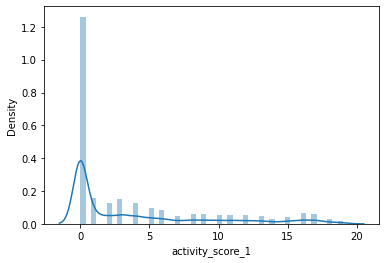

In [ ]:
sns.distplot(df_t['activity_score_1'])

In [ ]:
df_t['activity_score_1'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

아래 score들과는 다르게 0-19 범위 내의 정수값으로 분포. 모종의 누적방식이 아니라 뭔가 횟수 제한이 있는 이벤트 이거나 상태를 표시하는 점수가 아닐까?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


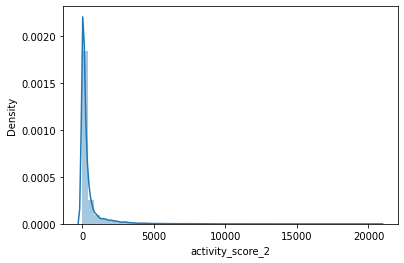

In [ ]:
sns.distplot(df_t['activity_score_2'])

In [ ]:
len(df_t[df_t['activity_score_2'] > 5000 ])

1407

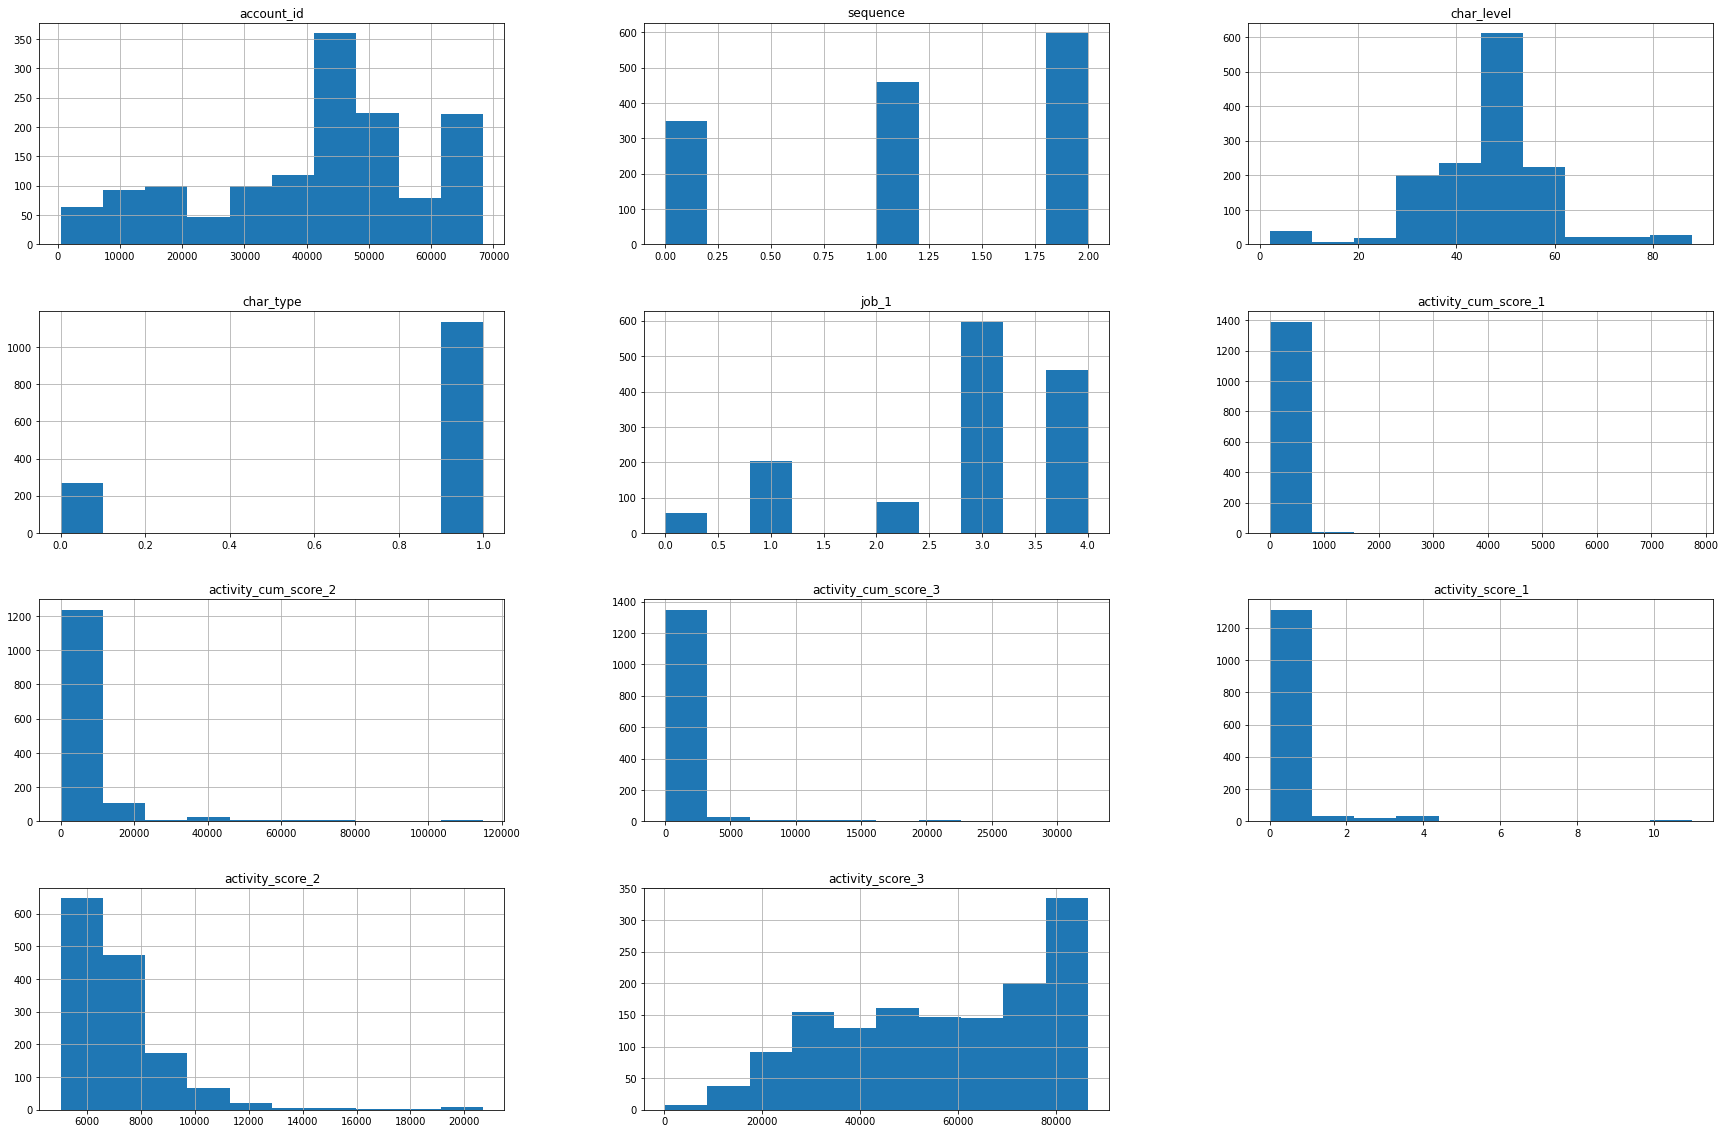

In [ ]:
df_sc2 = df_t[df_t['activity_score_2'] > 5000 ]
h = df_sc2.hist(figsize=(30,20))

전체가 13만건이 되어가는데 99%의 자료는 5천 이하에 분포되어 있고 1%의 유저들이 5천~ 소수 존재. 5천 이상을 기록하는 유저들의 데이터만 분리해 상관관계를 추측해보고 뚜렷한 관계가 보이지 않는다면 배제하는게 피쳐의 정밀도를 올릴수 있을것같다. 분포가 저래서야 정규화 해도 99%의 데이터간 격차가 지나치게 작게 보일것같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


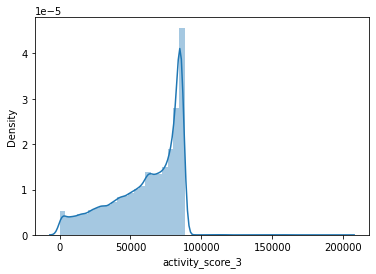

In [ ]:
sns.distplot(df_t['activity_score_3'])

In [ ]:
len(df_t[df_t['activity_score_3'] > 86500 ])

94

3도 마찬가지. 99.9%의 데이터가 86500 이하의 점수대에 포진되어 있으며 0.1%의 유저군이 전체 범위를 끌어올리고 있다. 위에서와 마찬가지로 분히 후 분석 시행한 뒤, 특별 케이스로 보던가 아니면 이상치 처리해야 할것같다.

8. activity_cum_score_1,2,3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


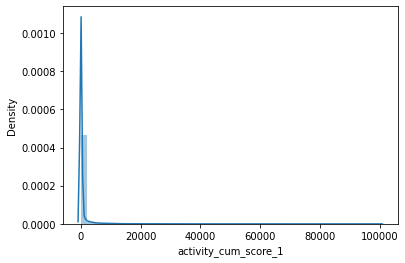

In [ ]:
sns.distplot(df_t['activity_cum_score_1'])

In [ ]:
len(df_t[df_t['activity_cum_score_1'] > 15000 ])

1320

스코어 데이터는 대부분 일부의 극단적인 점수기록자가 존재한다. 그게 다른 피쳐와도 상관관계를 갖는지 따로 분리해서 알아볼 필요가 있을것같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


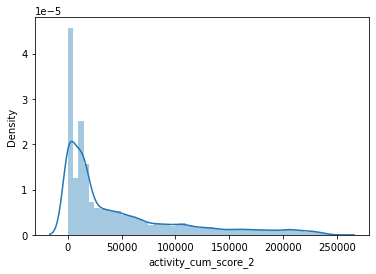

In [ ]:
sns.distplot(df_t['activity_cum_score_2'])

In [ ]:
df_t['activity_cum_score_2'].max() 

249270

cum_score_2 는 보기 드물게 고른 분포도를 보인다. 극단적인 점수쌓기가 힘든 활동일지도. 그대로 써도 될거같다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


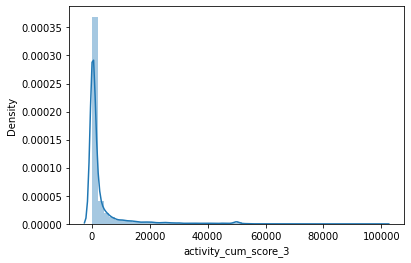

In [ ]:
sns.distplot(df_t['activity_cum_score_3'])

In [ ]:
len(df_t[df_t['activity_cum_score_3'] > 52000 ])

531

50000<  1459건  
51000<  607건  
52000<  531건
저 볼록한 부분에 그래도 천 여건정도 있는것같은데 이 경우엔 하나의 '졸업' 구간을 의미하는것일지도?

9. is_bot : 타겟

In [ ]:
print('is_bot True값 : '+str(len(df_t[df_t['is_bot'] == True])))
print('is_bot False값 : '+str(len(df_t[df_t['is_bot'] == False])))

is_bot True값 : 60199
is_bot False값 : 75169


10. 기타

In [ ]:
df_te = df_t.groupby("account_id")
df_tee = df_te['is_bot', 'sequence'].mean()

bool1 = df_tee['is_bot'] != 1.0
bool0 = df_tee['is_bot'] != 0.0

subset_df_tee = df_tee[bool1 & bool0]
TF_users = subset_df_tee.index.to_list()
len(TF_users)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


182

유저id 별 데이터가 복수 존재한다면, 같은 id 내에서도 True와 False가 혼재되어 있는 경우가 있을까? 있다면 그게 무엇을 의미하는가?  
= 그룹화 해서 유저 별 샘플 데이터를 한번 들여다보는것도 좋을듯.  
= 존재했다... 182건...

11. 교차분석 & 시각화

In [ ]:
# 교차분석표용 함수 선언
def get_crosstab(df, feature) : 
  cr = pd.crosstab(df[feature], df['is_bot'], normalize='index')*100
  cr = cr.reset_index()
  return cr

# 그래프 percent 표시용 함수 선언 
def percent(ax, size) : 
  for patch in ax.patches :
    height = patch.get_height()
    width = patch.get_width()
    left_coord = patch.get_x()
    percent = (height/size)*100
    ax.text(x=left_coord+ width/2.0 , y=height+size*0.005, s= f'{percent:1.1f}%', ha='center')

# 비율 곡선 추가 표시용 함수 선언
def ratioplot(ax, feature, crosstab) : 
  ax = ax.twinx()
  ax = sns.pointplot(x=feature, y=1, data=crosstab, order = crosstab[feature].values, color='black', legend=False)
  ax.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
  ax.set_ylabel('is_bot ratio')

In [ ]:
# 교차분석표를 활용한 두개 is_bot 연관성 탐색용 시각화 함수
def plot_true_ratio(df, features, rows, cols, size = (15,20)):
  plt.figure(figsize = size)
  grid = gs.GridSpec(rows, cols)
  plt.subplots_adjust(wspace = 0.45, hspace = 0.3)

  for idx, feature in enumerate(features):
    ax= plt.subplot(grid[idx])
    crosstab = get_crosstab(df, feature)
    sns.countplot(x= feature, data = df, order = crosstab[feature].values, color = 'skyblue', ax=ax)
    ratioplot(ax, feature, crosstab)
    percent(ax, len(df))
    ax.set_title(f'{feature} & is_bot')

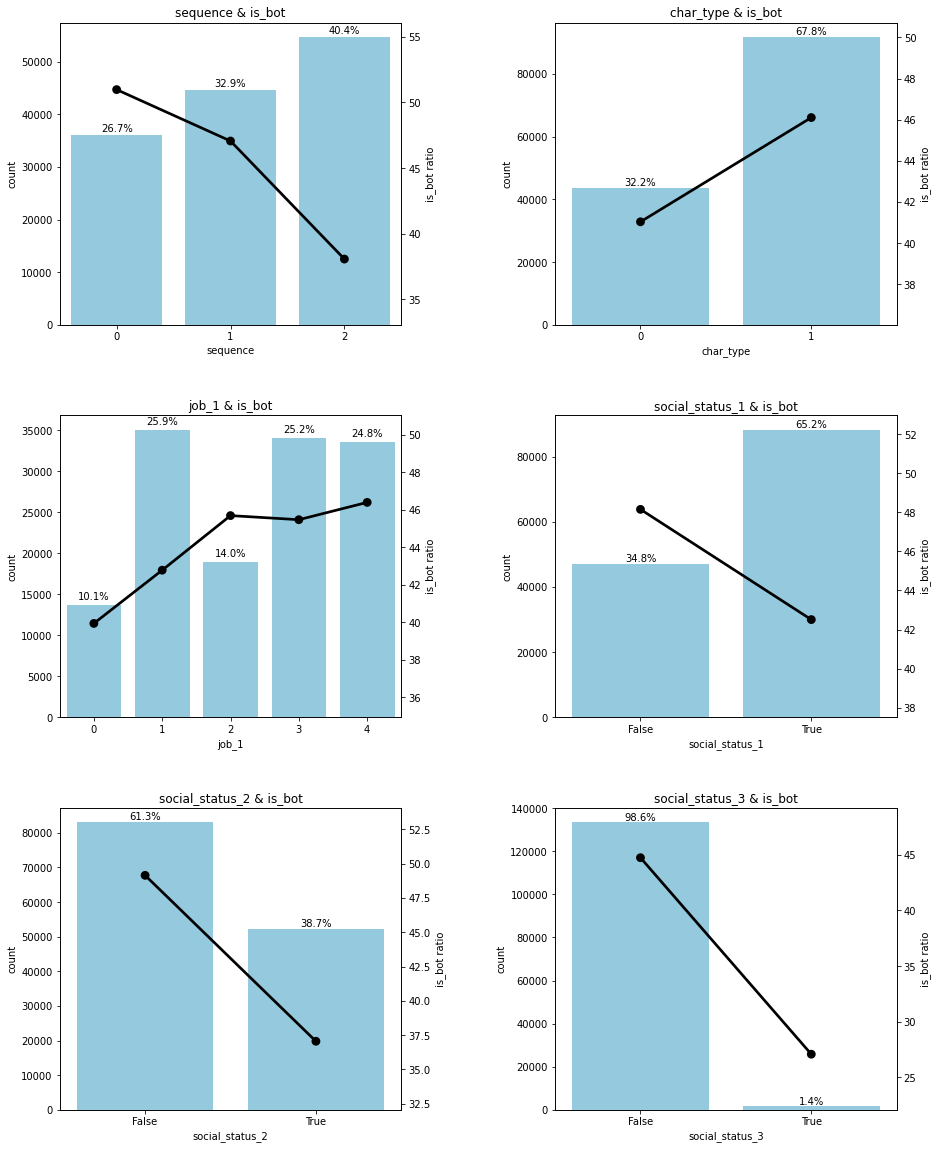

In [ ]:
# 원핫 인코딩 예정중인 명목형 피쳐들
features = ['sequence', 'char_type', 'job_1', 'social_status_1', 'social_status_2', 'social_status_3']
plot_true_ratio(df_t, features, rows=3, cols= 2)

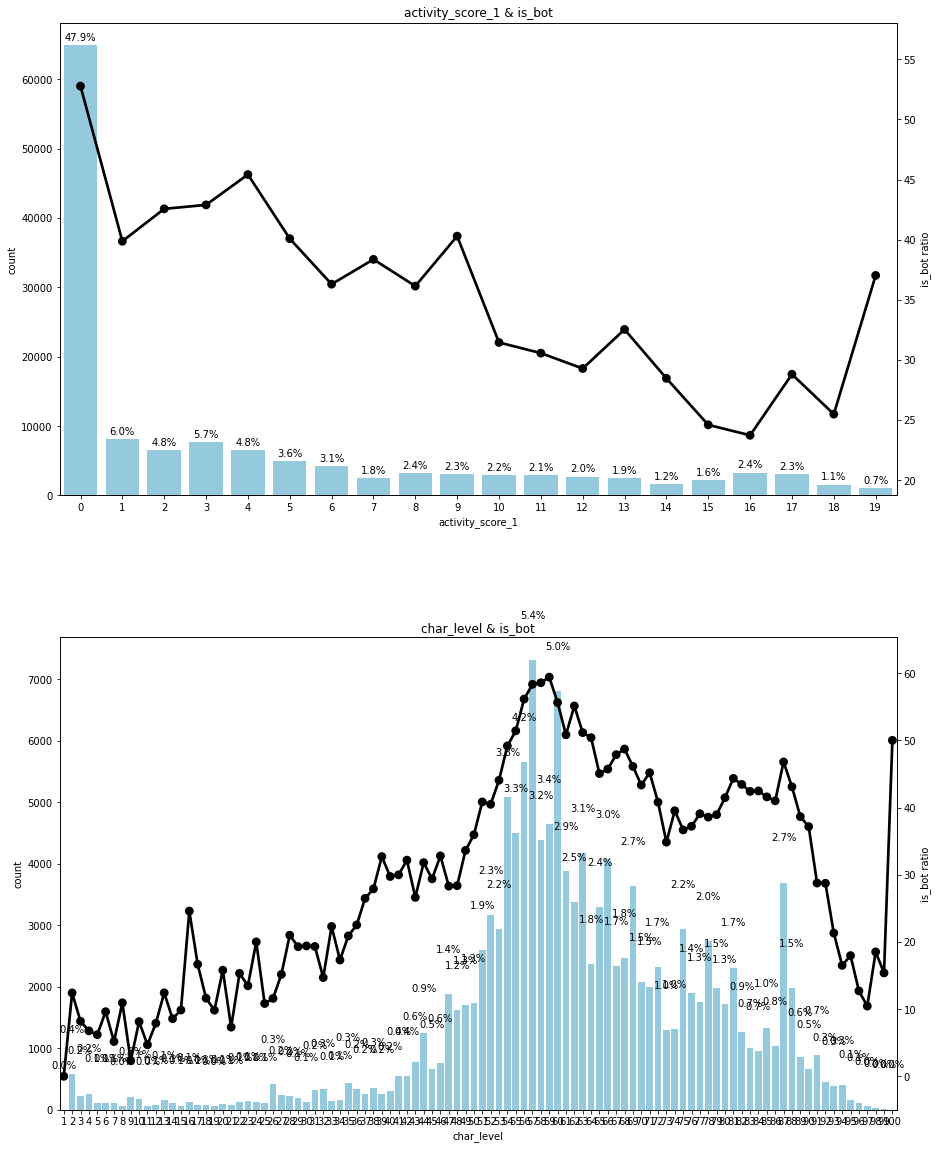

In [ ]:
# 그외 순서형 피처들... 은 처리를 못해서 변수가 적은 activity_score_1, char_level만 그렸다
features = ['activity_score_1', 'char_level']
plot_true_ratio(df_t, features, rows=2, cols= 1)

##타겟과 피쳐간 상관관계 분석

*   우선, char_level이 약간 애매하지만 전체적으로 패턴을 따라가는 경향이 관찰되었다.
*   명목변수중 sequence, social_status_1, social_status_2, social_status_3 는 반비례의 경향성이, char_type, job_1 은 정방향의 패턴을 보였다
*   순서형 변수들중 activity_score_1은 낮지만 꾸준한 반비례 패턴을, char_level 분포도와 유사한 패턴을 보이지만(최종 레벨 100 제외) 전체적으로는 정비례 패턴을 보였다.

이상의 분석에서, 무관계로 보이는 피처는 없으며 모두 인코딩 단계로 넘어가도 될것으로 판단된다.

## 피쳐별 특징 정리
account_id
*   int타입. 약 13만개의 데이터 중 약 4만개의 ID. ID당 액션이 3-4개 쯤인듯. 위의 실제 데이터를 보면 1-2개밖에 없는 계정도 있지만 10개씩 되는 ID도 있는것같다. 실제 피쳐분석에는 큰 의미 없어보이는 식별용 ID넘버 일듯.

*   유저 데이터가 무리지어 있는건 사실이나 여러번 입력된 ID도 있었다. 그리고 그중 182건의 유저는 TRUE 값도 FALSE값도 가지고 있는 유저들도있었다. 즉 is_bot은 유저 ID에 종속된게 아니라 그냥 순수하게 건당으로 식별하는것으로 추정된다.

*   다만 그나마 다행(?)인것은 시퀀스 이외의 구체적인 시간 데이터가 없다는 점이었다. 시간 순으로 이상여부를 판단해 딱지 붙이는 타입이면 언제 이상계정으로 찍혔는지도 고려해야되서 굉장히 번거로웠을거같은데, 그게 아니기 때문에 정말 순수하게 건당 식별, 훈련 해야 한다는 의미라고 파악된다.  

*   고로, 배제한다.

sequence
*   0과 1과 2의 세가지 피쳐. 현재로썬 어떠한 시간순서를 표현한것으로 추측되지만 구체적으로 알 방법이 없다.  

*   또한, 당초 데이터를 들여다보기 전에는 valid set 역시 train에 병합해서 훈련 데이터를 추가 확보 할 심산이었는데, sequence 피쳐가 무해함을 확신 할 수 없는 현재, 그것은 불가능 하다고 판단된다. 따라서 훈련은 train으로 한정지어 시행하고 valid 셋은 테스트 용으로만 활용토록한다. train set을 추가로 K-fold Cross Validation 할지의 여부는 첫 학습 이후 고려하도록 한다.  

*   원핫 인코딩, 배치.

char_level
*   1부터 100까지 정수값. 높고 낮음을 가릴 수 있는 순서형 피쳐이므로 인코딩 없이 배치.

char_type
*   0과 1 두가지. 타입을 나타내는 명목형이므로 원핫 인코딩, 배치.

job_1
*   0부터 4까지 다섯가지 정수. 마찬가지로 명목형이므로 원핫 인코딩, 배치.

social_status_1,2,3,4
*   True와 False 두가지 bool. 특히 3과 4는 TF의 비율이 한쪽에 치우쳐진 경향을 보이므로 예의 주시. 원핫 인코딩, 배치

activity_cum_score_1,2,3
*   음이 아닌 정수값. 크기를 의미하는 순서형이므로 인코딩 없이 배치. 
단, 최대값이 지나치게 커 1% 이내의 극단적 스코어를 기록한  유저들은 별도로 떼어내 관찰.  
1 - 15000 이상 커트  
2 - 그대로 사용  
3 - 52000 이상 커트  

activity_score_1,2,3
*   cum과 비슷한 가치.  
1 - 0-19의 정수값을 가짐. 스코어 임에도 명목형의 형태를 띠고 있는것처럼 보이는데, 일단 스코어로 명명 되어 있으니 순서형이라 가정하고 인코딩 없이 배치.  
2 - 5000 이상 커트  
3 - 86500 이상 커트  

is_bot
*   True는 1 False는 0으로 인코딩. 배치.

##전처리 과정

현재 피쳐들 스테이터스  
*   삭제 : account_id

*   원핫인코딩(개수) : 
  1. sequence(3) 
  2. char_type(2) 
  3. job_1(5)

*   변경(개수) : 
  1.  is_bot(2, 타겟)
  2. social_status_1,2,3,4(2) 

*   냅둠 + 정규화(범위) : ,

  1.   char_level(1-100)
  2.   activity_score_1(0-19), 2(0-5000), 3(0-86500)
  3.   activity_cum_score_1(0-15000),  2(0-249270),  3(0-52000)

*   표준화 대신 임의의 기준을 선택한 이유
= 대부분의 그래프가 피라미드 형태의 그래프를 띠고 있어 표준화보다는 어떠한 기준(1% 남짓)을 세워 상위 값들을 이상치 처리해 잘라본 결과, 최소 50% 많으면 70%이상 범위가 축소되는 효과를 보았기에 임의로 처리하였다. 대신 조정한 범위 내에서 정규화를 시행해 처리하였다.

In [ ]:
# 1. 모든 명목형, 논리형 변수들 인코딩. 타겟 값 변형
df_t2 = pd.get_dummies(data = df_t, columns = ['sequence'], prefix = 'sequence')
df_t2 = pd.get_dummies(data = df_t2, columns = ['char_type'], prefix = 'char_type')
df_t2 = pd.get_dummies(data = df_t2, columns = ['job_1'], prefix = 'job_1')
df_t2 = df_t2.astype({'is_bot':'int64', 'social_status_1':'int64', 'social_status_2':'int64', 'social_status_3':'int64', 'social_status_4':'int64'})
df_t2

,account_id,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,...,sequence_0,sequence_1,sequence_2,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
0,616,79,1,1,0,0,352,154005,42233,13,...,1,0,0,1,0,0,0,0,1,0
1,616,82,1,1,0,0,1015,154005,42233,13,...,1,0,0,0,1,0,0,0,1,0
2,616,94,1,1,0,0,25860,154005,42233,13,...,1,0,0,0,1,0,0,0,1,0
3,669,95,1,1,0,0,25032,211380,2664,15,...,1,0,0,0,1,1,0,0,0,0
4,669,63,1,1,0,0,16,211380,2664,15,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135363,64975,53,0,0,0,1,2,2956,141,0,...,0,0,1,0,1,0,0,0,1,0
135364,65359,55,0,0,0,1,1,362,150,0,...,0,0,1,0,1,0,0,0,1,0
135365,65585,44,0,0,0,1,1,1704,11,0,...,0,0,1,0,1,0,0,0,1,0
135366,65655,41,0,0,0,0,1,1820,10,0,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
# 2. 이상치형 데이터들 잘라내 별도 데이터 프레임으로 분리.
# activity_score_2(0-5000), 3(0-86500)
# activity_cum_score_1(0-15000), 3(0-52000)
df_as2 = df_t2[df_t2['activity_score_2'] > 5000]
df_as3 = df_t2[df_t2['activity_score_3'] > 86500]
df_acs1 = df_t2[df_t2['activity_cum_score_1'] > 15000]
df_acs3 = df_t2[df_t2['activity_cum_score_3'] > 52000]

In [ ]:
as2 = df_t2['activity_score_2'] <= 5000
as3 = df_t2['activity_score_3'] <= 86500
acs1 = df_t2['activity_cum_score_1'] <= 15000
acs3 = df_t2['activity_cum_score_3'] <= 52000

df_t3 = df_t2[as2 & as3 & acs1 & acs3]
df_t3

,account_id,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,...,sequence_0,sequence_1,sequence_2,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
0,616,79,1,1,0,0,352,154005,42233,13,...,1,0,0,1,0,0,0,0,1,0
1,616,82,1,1,0,0,1015,154005,42233,13,...,1,0,0,0,1,0,0,0,1,0
4,669,63,1,1,0,0,16,211380,2664,15,...,1,0,0,1,0,0,1,0,0,0
5,1243,91,1,1,0,0,408,36460,1402,1,...,1,0,0,1,0,0,1,0,0,0
6,1243,79,1,1,0,0,438,36460,1402,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135363,64975,53,0,0,0,1,2,2956,141,0,...,0,0,1,0,1,0,0,0,1,0
135364,65359,55,0,0,0,1,1,362,150,0,...,0,0,1,0,1,0,0,0,1,0
135365,65585,44,0,0,0,1,1,1704,11,0,...,0,0,1,0,1,0,0,0,1,0
135366,65655,41,0,0,0,0,1,1820,10,0,...,0,1,0,0,1,0,0,0,0,1


135368건에서 132075건으로 3293건 감소.

In [ ]:
# 3. TF가 혼재된 182명의 유저들은 복사해서 별도로 재차 관찰. 
# 이상이 있다기보단 같은 유저인데 T F 가 섞여있다는건 특정한 스탯의 격차가 결정했을 가능성 있음.
TF_ind = df_t3['account_id'].isin(TF_users)
df_FT = df_t3.loc[TF_ind]
df_FT

,account_id,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,...,sequence_0,sequence_1,sequence_2,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
304,43171,87,1,1,0,0,2403,60,5922,0,...,1,0,0,0,1,0,1,0,0,0
819,40153,44,0,0,0,1,1,4300,5,0,...,1,0,0,0,1,0,0,0,0,1
820,40287,27,0,0,0,0,1,100,1,0,...,1,0,0,1,0,0,1,0,0,0
940,65667,13,0,0,0,0,1,100,1,0,...,1,0,0,0,1,0,0,0,0,1
942,66277,26,0,0,0,0,1,100,2,0,...,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133756,66496,43,0,0,0,0,1,5250,3,0,...,0,0,1,1,0,0,0,0,0,1
133790,778,56,1,0,0,0,3,6464,20,0,...,0,0,1,0,1,1,0,0,0,0
133791,778,26,0,0,0,0,1,6464,20,0,...,0,0,1,0,1,0,0,0,0,1
133792,778,40,0,0,0,0,1,6464,20,0,...,0,0,1,0,1,0,1,0,0,0


In [ ]:
# df_FT.to_csv('df_FT.csv', sep=',')
summary(df_FT)

데이터set 크기 : (555, 23)


KeyError: ignored

In [ ]:
# 4. 3에서 따로 챙겼으니 account_id 제거, 이상치 제거 한 데이터셋 정규화.
# activity_cum_score_1,2,3, activity_score_1,2,3 이 대상.
df_t4 = df_t3.drop(['account_id'], axis=1)

scaler = MinMaxScaler()

nomal_columns = ['char_level','activity_cum_score_1','activity_cum_score_2','activity_cum_score_3','activity_score_1','activity_score_2','activity_score_3']
x = df_t4[nomal_columns].values
x_scaled = scaler.fit_transform(x)
df_t5 = pd.DataFrame(x_scaled, columns=nomal_columns, index = df_t4.index)
df_t4[nomal_columns] = df_t5
df_t4 = df_t4.reset_index()

## 학습 시작

train set에는 'sequence'가 있지만 valid, test set에는 존재하지 않는다. 그래서 이게 실수인지 고의인지 의문이지만, 훈련하라고 지정해준 train set에는 포함되어 있기 때문에 sequence를 포함해 모델을 생성한다. 기준치 이상(약 70% 이상?)의 결과가 나오면 일단 거기까지.  

이후 결국 valid, test set을 돌려보기 위해서 sequence 칼럼의 존재는 방해되기만 한다.
1.  valid, test에 임의로 sequence 값을 부여한다.
2.  train set에서 sequence값을 드랍한다.

1의 경우, 변수에서 sequence가 로지스틱 회귀에서 각기 차지하는 비중이 무시 할 수 있는 수준은 아니다. 따라서, 섣불리 임의의 값을 채워 넣으면 오류가 커질 가능성이크다.
고로 2번 방법을 사용하여 재계산한다.


1. 로지스틱 회귀(with 'sequence')

In [ ]:
# x, y 분리
x_train = df_t4.drop(['index', 'is_bot'], axis=1)
y = df_t4['is_bot']

X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y, test_size=0.1, stratify=y, random_state=10)

In [ ]:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
logistic_model.predict_proba(X_valid)

array([[0.79679857, 0.20320143],
       [0.78310588, 0.21689412],
       [0.27914275, 0.72085725],
       ...,
       [0.55073001, 0.44926999],
       [0.69158298, 0.30841702],
       [0.22355727, 0.77644273]])

In [ ]:
logistic_model.predict(X_valid)

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
# 칼럼별 기여도
print(logistic_model.coef_, logistic_model.intercept_)

[[ 1.49779767e+00 -4.82204913e-02  3.35558069e-02 -5.90168359e-01
   7.96812703e-01 -5.28215122e-01 -1.63854666e+00 -1.05405682e-01
  -8.60006498e-01 -5.91497709e+00  1.62101472e+00  2.66563240e-01
   5.11112806e-02 -3.18923336e-01 -4.97854350e-02  4.85366203e-02
   2.67220062e-03 -5.42936622e-02  8.24728188e-04  8.26644770e-02
  -3.31165584e-02]] [-1.4797547]


In [ ]:
y_valid_preds = logistic_model.predict_proba(X_valid)[:, 1]

In [ ]:
roc_auc = roc_auc_score(Y_valid, y_valid_preds)
print(f'검증 데이터 ROC AUC :  {roc_auc:.4f}')

검증 데이터 ROC AUC :  0.7608


2. 로지스틱 회귀(without 'sequence')

In [ ]:
# x, y 분리
x2_train = df_t4.drop(['index', 'is_bot', 'sequence_0', 'sequence_1', 'sequence_2'], axis=1)
y = df_t4['is_bot']

X2_train, X2_valid, Y2_train, Y2_valid = train_test_split(x2_train, y, test_size=0.1, stratify=y, random_state=10)

In [ ]:
# logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X2_train, Y2_train)
logistic_model.predict_proba(X2_valid)

array([[0.75208056, 0.24791944],
       [0.73343144, 0.26656856],
       [0.3018922 , 0.6981078 ],
       ...,
       [0.48488693, 0.51511307],
       [0.70442435, 0.29557565],
       [0.18031721, 0.81968279]])

In [ ]:
# 칼럼별 기여도
print(logistic_model.coef_, logistic_model.intercept_)

[[ 1.52074041 -0.04366294  0.02938173 -0.55964939  0.80339369 -0.52565628
  -1.63918862 -0.12532584 -0.85486989 -5.90090443  1.57342889 -0.48391568
  -0.38637562 -0.17290164 -0.22906467 -0.1711771  -0.09263709 -0.2045108 ]] [-0.89506232]


In [ ]:
y2_valid_preds = logistic_model.predict_proba(X2_valid)[:, 1]

In [ ]:
roc_auc = roc_auc_score(Y2_valid, y2_valid_preds)
print(f'검증 데이터 ROC AUC :  {roc_auc:.4f}')

검증 데이터 ROC AUC :  0.7537


sequence 변수를 배제한 후, 약 0.7%의 정확도 하락. 대신 valid set을 활용할 수 있게 되었다. 확인해보자.

3. 로지스틱 회귀(without 'sequence') + train/valid set

*   valid set 전개

In [ ]:
df_v = pd.read_csv(base_url+'valid.csv')
df_v

,account_id,char_level,char_type,job_1,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,is_bot
0,150,19,1,3,False,True,False,False,1,6200,1,0,1100,2626,False
1,796,82,1,4,True,True,False,False,221,49575,511,4,100,4933,False
2,1233,61,0,2,True,True,False,False,1,224875,14887,11,330,53056,False
3,1233,91,0,3,True,True,False,False,4129,224875,14887,11,330,53056,False
4,1233,47,0,1,True,True,False,False,1,224875,14887,11,330,53056,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57064,66358,51,1,2,True,False,False,True,1,4422,26,0,160,24280,True
57065,66567,51,0,4,False,False,False,True,1,720,31,0,280,44520,True
57066,68224,43,1,4,False,False,False,True,1,2820,5,0,100,17529,False
57067,68794,47,1,1,False,False,False,True,1,900,17,0,4042,55183,True


In [ ]:
# valid set 전처리

# 1. 모든 명목형, 논리형 변수들 인코딩. 타겟 값 변형
df_v2 = pd.get_dummies(data = df_v, columns = ['char_type'], prefix = 'char_type')
df_v2 = pd.get_dummies(data = df_v2, columns = ['job_1'], prefix = 'job_1')
df_v2 = df_v2.astype({'is_bot':'int64', 'social_status_1':'int64', 'social_status_2':'int64', 'social_status_3':'int64', 'social_status_4':'int64'})
# 4. 3에서 따로 챙겼으니 account_id 제거, 이상치 제거 한 데이터셋 정규화.
# activity_cum_score_1,2,3, activity_score_1,2,3 이 대상.
df_v3 = df_v2.drop(['account_id'], axis=1)

df_v3 = df_v3[as2 & as3 & acs1 & acs3]

nomal_columns = ['char_level','activity_cum_score_1','activity_cum_score_2','activity_cum_score_3','activity_score_1','activity_score_2','activity_score_3']
x = df_v3[nomal_columns].values
x_scaled = scaler.fit_transform(x)
df_v4 = pd.DataFrame(x_scaled, columns=nomal_columns, index = df_v3.index)
df_v3[nomal_columns] = df_v4
df_v3 = df_v3.reset_index(drop=True)
df_v3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,is_bot,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
0,0.181818,0,1,0,0,0.000000,0.025124,0.000000,0.000000,0.064916,0.015054,0,0,1,0,0,0,1,0
1,0.818182,1,1,0,0,0.002585,0.200887,0.005100,0.210526,0.005901,0.028442,0,0,1,0,0,0,0,1
2,0.464646,1,1,0,0,0.000000,0.911237,0.148861,0.578947,0.019475,0.307719,0,1,0,0,1,0,0,0
3,0.585859,1,1,0,0,0.000012,0.911237,0.148861,0.578947,0.019475,0.307719,0,1,0,0,1,0,0,0
4,0.868687,1,1,0,0,0.047574,0.683625,0.018470,0.894737,0.020360,0.300151,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54926,0.505051,1,0,0,1,0.000000,0.017919,0.000250,0.000000,0.009442,0.140721,1,0,1,0,0,1,0,0
54927,0.505051,0,0,0,1,0.000000,0.002918,0.000300,0.000000,0.016524,0.258181,1,1,0,0,0,0,0,1
54928,0.424242,0,0,0,1,0.000000,0.011427,0.000040,0.000000,0.005901,0.101542,0,0,1,0,0,0,0,1
54929,0.464646,0,0,0,1,0.000000,0.003647,0.000160,0.000000,0.238536,0.320063,1,0,1,0,1,0,0,0


In [ ]:
x_valid_v = df_v3.drop(['is_bot'], axis=1)
y_valid_v = df_v3['is_bot']

In [ ]:
# x, y 분리
x3_train = df_t4.drop(['index', 'is_bot', 'sequence_0', 'sequence_1', 'sequence_2'], axis=1)
y = df_t4['is_bot']

# X2_train, X2_valid, Y2_train, Y2_valid = train_test_split(x2_train, y, test_size=0.1, stratify=y, random_state=10)
X3_train, X3_valid, Y3_train, Y3_valid = x3_train, x_valid_v , y , y_valid_v

In [ ]:
# logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X3_train, Y3_train)
logistic_model.predict_proba(X3_valid)

array([[0.80968462, 0.19031538],
       [0.67899799, 0.32100201],
       [0.90728408, 0.09271592],
       ...,
       [0.48208622, 0.51791378],
       [0.71599134, 0.28400866],
       [0.65632175, 0.34367825]])

In [ ]:
# 칼럼별 기여도
print(logistic_model.coef_, logistic_model.intercept_)

[[ 1.50643752 -0.04851596  0.04054321 -0.53339859  0.79617907 -0.52383719
  -1.66797547 -0.13228581 -0.842696   -5.95078703  1.56911615 -0.47207616
  -0.38946489 -0.17383303 -0.22766732 -0.17302313 -0.08805032 -0.19896725]] [-0.88030316]


In [ ]:
y3_valid_preds = logistic_model.predict_proba(X3_valid)[:, 1]

In [ ]:
roc_auc = roc_auc_score(Y3_valid, y3_valid_preds)
print(f'검증 데이터 ROC AUC :  {roc_auc:.4f}')

검증 데이터 ROC AUC :  0.7161


4. 로지스틱 회귀(without 'sequence') + train/valid 합체 후 쪼개기

In [ ]:
x4_train = df_t4.drop(['index', 'sequence_0', 'sequence_1', 'sequence_2'], axis=1)

x4_valid = df_v3

TV_data = pd.concat([x4_train, x4_valid])
y4 = TV_data['is_bot']

TV_data = TV_data.drop('is_bot', axis = 1)

In [ ]:
X4_train, X4_valid, Y4_train, Y4_valid = train_test_split(TV_data, y4, test_size=0.1, stratify=y4, random_state=10)

In [ ]:
# logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X4_train, Y4_train)
logistic_model.predict_proba(X4_valid)

array([[0.45139799, 0.54860201],
       [0.28603748, 0.71396252],
       [0.42145501, 0.57854499],
       ...,
       [0.73241394, 0.26758606],
       [0.46831757, 0.53168243],
       [0.50280629, 0.49719371]])

In [ ]:
# 칼럼별 기여도
print(logistic_model.coef_, logistic_model.intercept_)

[[ 1.63294736 -0.04625675 -0.00946592 -0.58799008  0.67427132 -0.53715037
  -1.6136531  -0.15853327 -0.81728477 -6.22066083  1.94071802 -0.57155845
  -0.49424163 -0.21909976 -0.28099577 -0.19092128 -0.1381652  -0.23661807]] [-1.09144223]


In [ ]:
y4_valid_preds = logistic_model.predict_proba(X4_valid)[:, 1]

In [ ]:
roc_auc = roc_auc_score(Y4_valid, y4_valid_preds)
print(f'검증 데이터 ROC AUC :  {roc_auc:.4f}')

검증 데이터 ROC AUC :  0.7531


단순히 train으로만 학습, valid로만 검증했을때는 약 71%의 일치율을 보였지만, 섞고 다시 분배한 결과 75%까지 끌어올릴수 있었다.

sequence 피쳐를 삭제하고 겨우 출발점에 돌아온 셈. 

5. 로지스틱 회귀 + 하이퍼 파라미터 조정

In [ ]:
logistic_model = LogisticRegression()

lr_params = {'C' : [0.1, 0.125, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7], 'max_iter' : [800, 900, 1000], 'solver' : ['liblinear'], 'random_state' : [42]}

gridsearch_logicmodel = GridSearchCV(estimator=logistic_model, param_grid=lr_params, scoring='roc_auc', cv = 5)
gridsearch_logicmodel.fit(X4_train, Y4_train)

print('하이퍼 파라미터 최적화 : ', gridsearch_logicmodel.best_params_)

하이퍼 파라미터 최적화 :  {'C': 0.7, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [ ]:
y5_valid_preds = gridsearch_logicmodel.predict_proba(X4_valid)[:, 1]

roc_auc = roc_auc_score(Y4_valid, y5_valid_preds)
print(f'검증 데이터 ROC AUC :  {roc_auc:.4f}')

검증 데이터 ROC AUC :  0.7509


원본과 큰 차이를 보이지 않는다.

6. Decision Tree

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X4_train, Y4_train)
print(dt.score(X4_train, Y4_train))
print(dt.score(X4_valid, Y4_valid))

0.9998455185526277
0.8964226511951232


89퍼?? 하지만 훈련 셋 일치율이 99.98%인데 그에 비하면 많이 부족하다. 과적합된 모델이라는 의미이므로 몇가지 파라미터를 조정해 Test 대비를 해보자.

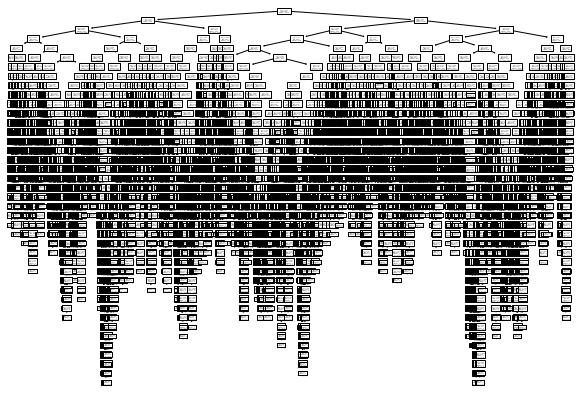

In [ ]:
# 17분 24초 걸린 그래프.
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

*   최대 깊이 제한. 샘플 테스트

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X4_train, Y4_train)
print(dt.score(X4_train, Y4_train))
print(dt.score(X4_valid, Y4_valid))

0.6962003505540536
0.6996952034650553


In [ ]:
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X4_train, Y4_train)
print(dt.score(X4_train, Y4_train))
print(dt.score(X4_valid, Y4_valid))

0.8090015151065031
0.7980321907919362


In [ ]:
dt = DecisionTreeClassifier(max_depth=11, random_state=42)
dt.fit(X4_train, Y4_train)
print(dt.score(X4_train, Y4_train))
print(dt.score(X4_valid, Y4_valid))

0.8239208579661923
0.8089941714346827


In [ ]:
dt = DecisionTreeClassifier(max_depth=13, random_state=42)
dt.fit(X4_train, Y4_train)
print(dt.score(X4_train, Y4_train))
print(dt.score(X4_valid, Y4_valid))

0.8553518909123318
0.8318806480936848


In [ ]:
print(dt.feature_importances_)

[3.13742392e-02 3.01281231e-03 1.38525145e-01 6.49459089e-04
 7.74505586e-02 5.66416807e-03 1.49882243e-01 3.72905626e-02
 2.82199376e-02 3.63494125e-01 1.61500519e-01 0.00000000e+00
 2.77297013e-04 1.70240124e-04 7.08410775e-04 1.22198713e-03
 3.07767163e-04 2.50528655e-04]


7. Decision Tree + 하이퍼 파라미터 조정

In [ ]:
# 파라미터 세팅
dt_params = {'min_impurity_decrease' : np.arange(0.0001, 0.0005, 0.0001), 'max_depth' : [7,13,1], 'min_samples_split' : [2, 40, 10]}
gridsearch_logicmodel = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=dt_params, scoring='roc_auc', n_jobs=-1)
gridsearch_logicmodel.fit(X4_train, Y4_train)

print('하이퍼 파라미터 최적화 : ', gridsearch_logicmodel.best_params_)
print(np.max(gridsearch_logicmodel.cv_results_['mean_test_score']))

하이퍼 파라미터 최적화 :  {'max_depth': 13, 'min_impurity_decrease': 0.0001, 'min_samples_split': 2}
0.871401649688915


In [ ]:
# 실제 테스트 결과
dt2 = gridsearch_logicmodel.best_estimator_
print(dt2.score(X4_valid, Y4_valid))

0.8037003368803808


파라미터를 너무 손봐서 그럴까, 훈련과 테스트의 격차가 큰데도 불구하고 80%. 깊이만 13으로 조정한 경우 약 2퍼의 차이를 보이며 83%를 기록한걸 보면 많이 건드리지 않는게 답일수도 있겠다.

*   여기서 한번, activity_cum_score2를 제거한 셋으로 테스트 해보자.

In [ ]:
TV_data2 = TV_data.drop(['activity_cum_score_2'], axis = 1)
X5_train, X5_valid, Y5_train, Y5_valid = train_test_split(TV_data2, y4, test_size=0.1, stratify=y4, random_state=10)

In [ ]:
TV_data2

,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
0,0.795918,1,1,0,0,0.023405,0.812419,0.684211,0.066000,0.513595,1,0,0,0,0,1,0
1,0.826531,1,1,0,0,0.067614,0.812419,0.684211,0.066000,0.513595,0,1,0,0,0,1,0
2,0.632653,1,1,0,0,0.001000,0.051228,0.789474,0.019000,0.494924,1,0,0,1,0,0,0
3,0.918367,1,1,0,0,0.027139,0.026951,0.052632,0.009000,0.406362,1,0,0,1,0,0,0
4,0.795918,1,1,0,0,0.029139,0.026951,0.052632,0.009000,0.406362,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54926,0.505051,1,0,0,1,0.000000,0.000250,0.000000,0.009442,0.140721,0,1,0,0,1,0,0
54927,0.505051,0,0,0,1,0.000000,0.000300,0.000000,0.016524,0.258181,1,0,0,0,0,0,1
54928,0.424242,0,0,0,1,0.000000,0.000040,0.000000,0.005901,0.101542,0,1,0,0,0,0,1
54929,0.464646,0,0,0,1,0.000000,0.000160,0.000000,0.238536,0.320063,0,1,0,1,0,0,0


In [ ]:
dt = DecisionTreeClassifier(max_depth=13, random_state=42)
dt.fit(X5_train, Y5_train)
print(dt.score(X5_train, Y5_train))
print(dt.score(X5_valid, Y5_valid))

0.841329728766228
0.8192075290091438


동일 조건, 동일 훈련모델 하에서 85.5, 83.2 (격차 2.3)를 기록했던것과 달리, 상관도가 높아 배제하자 오히려 일치율이 내려간것을 확인 할 수 있었다. (훈련 1.4, 검증 1.3, 격차 2.2)  
보통 0.8 초과하는 수치에 한해 신중하게 제거한다는점, 또한 다른 피쳐들과는 관계가 나쁘지 않았다는 점 등이 오히려 악재로 작용한게 아닐까 싶다. 

8. RandomForest

In [ ]:
rf = RandomForestClassifier(n_jobs = -1, random_state=42)
scores = cross_validate(rf, X4_train, Y4_train, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9998796827188736 0.8988384183476427


이것도 과대적합... 제약없던 DecisionTree와 수치가 거의 비슷하다. 하이퍼파라미터는 패스.

9. Extra Trees

In [ ]:
et = ExtraTreesClassifier(n_jobs = -1, random_state = 42)
scores = cross_validate(et, X4_train, Y4_train, return_train_score=True, n_jobs=-1)
print('Extra Trees : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

Extra Trees :  0.9998796827188736 ,  0.8676866403255994


모델의 무작위성이 큰 만큼 시간은 배로 썼지만 valid 일치율은 더 낮게 나왔다. 패스.

10. Gradient boosting


In [ ]:
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, X4_train, Y4_train, return_train_score=True, n_jobs=-1)
print('Gradient boosting : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

Gradient boosting :  0.7756246100828854 ,  0.7742313062594695


그레디언트 부스팅은 항상 훈련과 검증 사이의 갭이 거의 없어서 좋다. 단점이라고 하면, 수치가 약간 낮다는것 정도. 하지만 훈련신뢰도가 매우 높으며 로지스틱 회귀 한계선이었던 75%에 비하면 높은 축에 속함을 알 수 있다.

11. Gradient boosting + Decision횟수 증가

In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X4_train, Y4_train, return_train_score=True, n_jobs=-1)
print('Gradient boosting2 : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

Gradient boosting2 :  0.8460919164611866 ,  0.8383529901072457


생각보다 더 괜찮게 나왔다. Decision tree 때는 2.4%p 정도 간극이 있었는데, 이번에는 거의 84%에 달하는 테스트 스코어를 달성하면서도 1%p미만의 차이를 보여준다.

12. Histogram boosting

In [ ]:
hb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hb, X4_train, Y4_train, return_train_score=True)
print('Histogram boosting : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

Histogram boosting :  0.8191943198360121 ,  0.8151629482190073


In [ ]:
hb.fit(X4_train, Y4_train)
hb.score(X4_valid, Y4_valid)

0.817229025185819

훈련데이터 81.9%, 내부 테스트 81.5%, valid set 도입결과 81.7% 굉장히 준수하고 안정적인 결과를 보이고 있다.

마지막으로, 히스토그램 기반 라이브러리 2종 XGBoost와 LightGBM을 테스트 해보고 모델 선정 단계로 넘어가겠다.

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_mathod = 'hist', random_state=42)
scores = cross_validate(xgb, X4_train, Y4_train, return_train_score=True)
print('XGBoost : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

XGBoost :  0.7727681887050296 ,  0.77159918006001


일치율은 나쁘지 않으나 80에 못미치는 완성도가 조금 아쉽다. 

In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, X4_train, Y4_train, return_train_score=True, n_jobs = -1)
print('LightGBM : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

LightGBM :  0.8245699771248626 ,  0.8206292148183358


0.4%p 차이로 82% 일치율. 나쁘지 않다.

13. 최종 선정된 모델 : Gradient boosting + Decision횟수 증가(n_estimators=500)

선정된 이유 : train과 valid사이의 오차가 0.8%p에 불과하면서도, 학습 일치율이 약 84%에 달하는 등 전반적으로 선택지 중 가장 우수한 모델이었다.

###valid set 특징

57069건, 15개 칼럼. sequence 부재

In [ ]:
summary(df_v)

데이터set 크기 : (57069, 15)


,index,데이터 타입,결측치 개수,유니크값 종류 개수,첫 번째 데이터,두 번째 데이터,세 번째 데이터,네 번째 데이터,다섯 번째 데이터
0,account_id,int64,0,26069,150,796,1233,1233,1233
1,char_level,int64,0,100,19,82,61,91,47
2,char_type,int64,0,2,1,1,0,0,0
3,job_1,int64,0,5,3,4,2,3,1
4,social_status_1,bool,0,2,False,True,True,True,True
5,social_status_2,bool,0,2,True,True,True,True,True
6,social_status_3,bool,0,2,False,False,False,False,False
7,social_status_4,bool,0,2,False,False,False,False,False
8,activity_cum_score_1,int64,0,4642,1,221,1,4129,1
9,activity_cum_score_2,int64,0,12606,6200,49575,224875,224875,224875


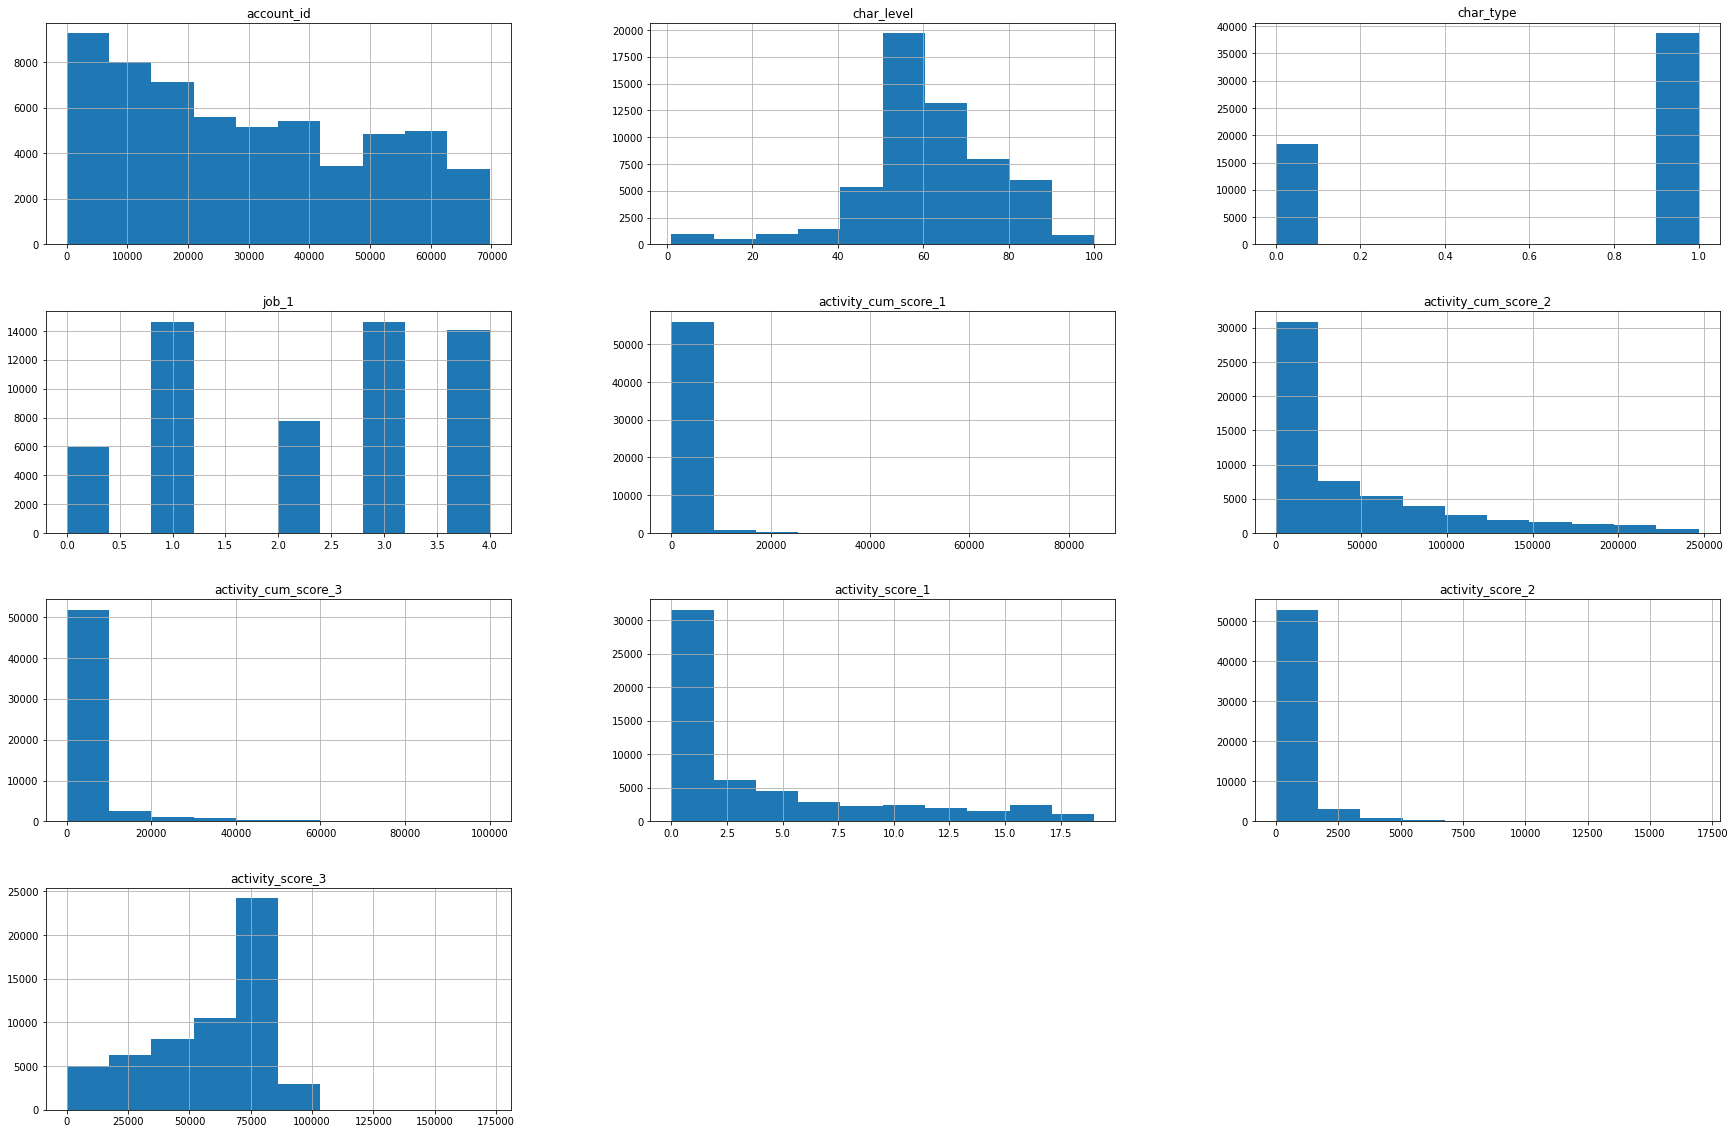

In [ ]:
k = df_v.hist(figsize=(30,20))

### test set에 적용

In [ ]:
df_test = pd.read_csv(base_url+'test.csv')
df_test

,account_id,char_level,char_type,job_1,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,is_bot
0,221,79,0,1,True,True,False,False,624,2110,10312,1,675,86257,NaN
1,244,75,1,0,True,True,False,False,70,157985,1540,19,680,82360,NaN
2,244,66,1,4,True,True,False,False,12,157985,1540,19,680,82360,NaN
3,244,87,0,1,True,True,False,False,2096,157985,1540,19,680,82360,NaN
4,244,66,1,1,True,True,False,False,12,157985,1540,19,680,82360,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60898,67007,37,1,4,False,False,False,False,1,2120,5,0,660,27367,NaN
60899,68222,46,1,4,False,False,False,False,1,2725,26,0,225,26674,NaN
60900,68681,52,1,3,True,False,False,False,2,5804,130,0,632,78509,NaN
60901,69379,48,1,4,False,False,False,False,1,3120,20,0,308,54645,NaN


60903건, 16개 칼럼. is_bot NaN.

In [ ]:
# id, is_bot,  제거
df_test2 = df_test.drop(['account_id', 'is_bot'], axis=1)

In [ ]:
df_test2

,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
0,79,1,1,0,0,624,2110,10312,1,675,86257,1,0,0,1,0,0,0
1,75,1,1,0,0,70,157985,1540,19,680,82360,0,1,1,0,0,0,0
2,66,1,1,0,0,12,157985,1540,19,680,82360,0,1,0,0,0,0,1
3,87,1,1,0,0,2096,157985,1540,19,680,82360,1,0,0,1,0,0,0
4,66,1,1,0,0,12,157985,1540,19,680,82360,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60898,37,0,0,0,0,1,2120,5,0,660,27367,0,1,0,0,0,0,1
60899,46,0,0,0,0,1,2725,26,0,225,26674,0,1,0,0,0,0,1
60900,52,1,0,0,0,2,5804,130,0,632,78509,0,1,0,0,0,1,0
60901,48,0,0,0,0,1,3120,20,0,308,54645,0,1,0,0,0,0,1


In [ ]:
# 1. 모든 명목형, 논리형 변수들 인코딩. 타겟 값 변형
df_test2 = pd.get_dummies(data = df_test2, columns = ['char_type'], prefix = 'char_type')
df_test2 = pd.get_dummies(data = df_test2, columns = ['job_1'], prefix = 'job_1')
df_test2 = df_test2.astype({'social_status_1':'int64', 'social_status_2':'int64', 'social_status_3':'int64', 'social_status_4':'int64'})

nomal_columns = ['char_level','activity_cum_score_1','activity_cum_score_2','activity_cum_score_3','activity_score_1','activity_score_2','activity_score_3']
x = df_test2[nomal_columns].values
x_scaled = scaler.fit_transform(x)
df_test3 = pd.DataFrame(x_scaled, columns=nomal_columns, index = df_test2.index)
df_test2[nomal_columns] = df_test3
df_test2 = df_test2.reset_index(drop=True)
df_test2

,char_level,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,char_type_0,char_type_1,job_1_0,job_1_1,job_1_2,job_1_3,job_1_4
0,0.787879,1,1,0,0,0.008258,0.008489,0.103549,0.052632,0.023356,0.500043,1,0,0,1,0,0,0
1,0.747475,1,1,0,0,0.000915,0.635627,0.015456,1.000000,0.023529,0.477444,0,1,1,0,0,0,0
2,0.656566,1,1,0,0,0.000146,0.635627,0.015456,1.000000,0.023529,0.477444,0,1,0,0,0,0,1
3,0.868687,1,1,0,0,0.027768,0.635627,0.015456,1.000000,0.023529,0.477444,1,0,0,1,0,0,0
4,0.656566,1,1,0,0,0.000146,0.635627,0.015456,1.000000,0.023529,0.477444,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60898,0.363636,0,0,0,0,0.000000,0.008529,0.000040,0.000000,0.022837,0.158524,0,1,0,0,0,0,1
60899,0.454545,0,0,0,0,0.000000,0.010964,0.000251,0.000000,0.007785,0.154505,0,1,0,0,0,0,1
60900,0.515152,1,0,0,0,0.000013,0.023351,0.001295,0.000000,0.021869,0.455111,0,1,0,0,0,1,0
60901,0.474747,0,0,0,0,0.000000,0.012553,0.000191,0.000000,0.010657,0.316716,0,1,0,0,0,0,1


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, X4_train, Y4_train, return_train_score=True, n_jobs=-1)
print('Gradient boosting2 : ',np.mean(scores['train_score']),', ',np.mean(scores['test_score']))

Gradient boosting2 :  0.8460919164611866 ,  0.8383529901072457


In [ ]:
gb_fit = gb.fit(X4_train, Y4_train)

In [ ]:
for i, col in enumerate(X4_train.columns):
    print(f'{col} 중요도 : {gb.feature_importances_[i]}')

char_level 중요도 : 0.01939185381883022
social_status_1 중요도 : 0.0028915977828342433
social_status_2 중요도 : 0.13409785980133326
social_status_3 중요도 : 0.0004603138150036956
social_status_4 중요도 : 0.060649200021394324
activity_cum_score_1 중요도 : 0.006938842600743507
activity_cum_score_2 중요도 : 0.18537897523737795
activity_cum_score_3 중요도 : 0.04661100739227298
activity_score_1 중요도 : 0.049196270059516954
activity_score_2 중요도 : 0.34490054036742507
activity_score_3 중요도 : 0.1461522251235575
char_type_0 중요도 : 0.0005195541608471185
char_type_1 중요도 : 0.0005411963410714566
job_1_0 중요도 : 7.328310453341642e-05
job_1_1 중요도 : 0.00026748371295788045
job_1_2 중요도 : 3.010450582146585e-05
job_1_3 중요도 : 0.0004321053338924183
job_1_4 중요도 : 0.0014675868205865116


In [ ]:
y_pred = gb_fit.predict(df_test2)

In [ ]:
df_test['is_bot'] = y_pred
df_test_fin = df_test.astype({'is_bot':'bool'})
df_test_fin

,account_id,char_level,char_type,job_1,social_status_1,social_status_2,social_status_3,social_status_4,activity_cum_score_1,activity_cum_score_2,activity_cum_score_3,activity_score_1,activity_score_2,activity_score_3,is_bot
0,221,79,0,1,True,True,False,False,624,2110,10312,1,675,86257,False
1,244,75,1,0,True,True,False,False,70,157985,1540,19,680,82360,True
2,244,66,1,4,True,True,False,False,12,157985,1540,19,680,82360,True
3,244,87,0,1,True,True,False,False,2096,157985,1540,19,680,82360,True
4,244,66,1,1,True,True,False,False,12,157985,1540,19,680,82360,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60898,67007,37,1,4,False,False,False,False,1,2120,5,0,660,27367,False
60899,68222,46,1,4,False,False,False,False,1,2725,26,0,225,26674,True
60900,68681,52,1,3,True,False,False,False,2,5804,130,0,632,78509,False
60901,69379,48,1,4,False,False,False,False,1,3120,20,0,308,54645,True


In [ ]:
df_test_fin['is_bot'].value_counts()

True     30881
False    30022
Name: is_bot, dtype: int64

In [ ]:
# 저장
df_test_fin.to_csv('test_result.csv', sep=',')